## CV_Assignment_1
1. What exactly is a feature?
2. For a top edge detector, write out the convolutional kernel matrix.
3. Describe the mathematical operation that a 3x3 kernel performs on a single pixel in an image.
4. What is the significance of a convolutional kernel added to a 3x3 matrix of zeroes?
5. What exactly is padding?
6. What is the concept of stride?
7. What are the shapes of PyTorch's 2D convolution's input and weight parameters?
8. What exactly is a channel?
9. Explain relationship between matrix multiplication and a convolution?

In [1]:
'''Ans 1:- In computer vision, a feature refers to a distinctive and
meaningful part or characteristic of an image that can be used to
identify and distinguish objects or patterns. Features can be
specific points, edges, textures, or other visual attributes that
are detectable within an image. These features are typically
extracted from raw image data and used in various computer vision
tasks, such as object detection, image matching, and image
recognition.  

For example, in the context of corner detection, a feature
might be a unique corner point in an image, and you can use a
corner detection algorithm like Harris Corner Detection to find
these features. In this example, feature points (corners) are
identified in the image, and their coordinates are printed as the
output. These feature points can then be used for further analysis
or computer vision tasks.'''

import cv2

# Load an image
image = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)

# Detect corners using Harris Corner Detection
corners = cv2.cornerHarris(image, 2, 3, 0.04)

# Threshold the corners to identify features
threshold = 0.01 * corners.max()
feature_points = []
for i in range(corners.shape[0]):
    for j in range(corners.shape[1]):
        if corners[i, j] > threshold:
            feature_points.append((i, j))

# Print the detected feature points
print("Detected feature points:")
print(feature_points)

Detected feature points:
[(49, 63), (50, 62), (50, 63), (50, 98), (51, 62), (51, 63), (51, 98), (51, 99), (52, 97), (52, 98), (55, 97), (55, 98), (56, 98), (56, 99), (56, 141), (57, 98), (141, 56), (141, 57), (142, 56), (142, 57), (142, 99), (146, 99), (148, 134)]


In [3]:
'''Ans 2:- A top edge detector kernel matrix is designed to highlight
the top edges in an image. One common kernel used for this
purpose is the Sobel kernel. The Sobel kernel for detecting top
edges looks like this:-

[-1 -2 -1]
[ 0  0  0]
[ 1  2  1]

In this 3x3 matrix, the center element (0,0) is the
current pixel, and the surrounding elements are used to calculate
the gradient. When this kernel is convolved with an image, it
emphasizes the top edges by highlighting the difference in intensity
between the pixels above and below the current pixel. The result
of this convolution operation is used to detect and enhance
top edges in the image.  we can apply this Sobel kernel to an
image using various image processing libraries like OpenCV in
Python.'''

import cv2
import numpy as np

# Load an image
image = cv2.imread('sample.png', cv2.IMREAD_GRAYSCALE)

# Define the Sobel kernel for top edge detection
sobel_kernel = np.array([[-1, -2, -1],
                          [ 0,  0,  0],
                          [ 1,  2,  1]])

# Apply the convolution operation using OpenCV
top_edge_detected_image = cv2.filter2D(image, -1, sobel_kernel)

# Display the top edge-detected image
cv2.imshow('Top Edge Detection', top_edge_detected_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

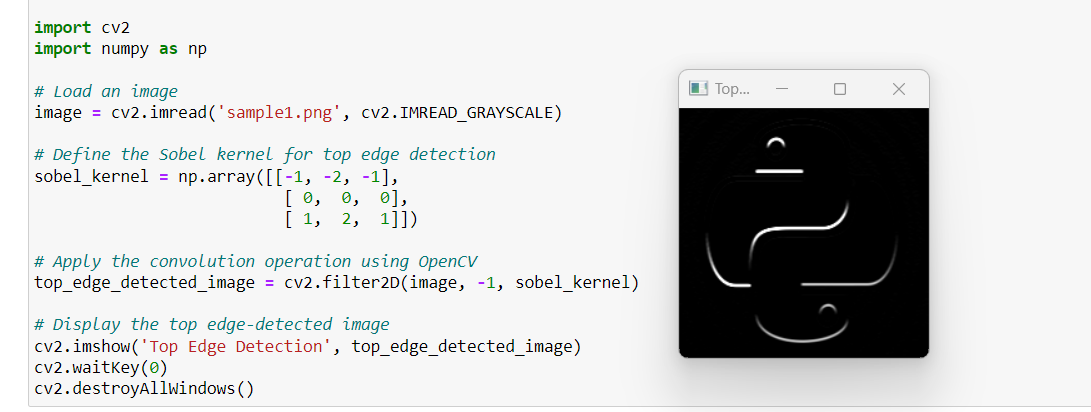

In [5]:
'''Ans 3:- A 3x3 kernel performs convolution on a single pixel by
multiplying the pixel's value and its neighboring pixels with the
corresponding values in the kernel matrix and summing the results. This
operation calculates a weighted average of pixel values, enhancing
or suppressing certain features. In Python, here's how the
operation is expressed. This code snippet calculates the result for
the central pixel using the 3x3 kernel values and its
surrounding pixels.

(pixel * kernel[1, 1] +
pixel_above * kernel[0, 1] +
pixel_below * kernel[2, 1] +
pixel_left * kernel[1, 0] +
pixel_right * kernel[1, 2] +
pixel_above_left * kernel[0, 0] +
pixel_above_right * kernel[0, 2] +
pixel_below_left * kernel[2, 0] +
pixel_below_right * kernel[2, 2]) '''

import numpy as np

# sample 3x3 kernel for illustration
kernel = np.array([[0.1, 0.2, 0.1],
                   [0.2, 0.4, 0.2],
                   [0.1, 0.2, 0.1]])

# sample 3x3 pixel neighborhood in the image
pixel_neighborhood = np.array([[10, 20, 30],
                                [40, 50, 60],
                                [70, 80, 90]])

# Perform convolution on the central pixel
result = np.sum(kernel * pixel_neighborhood)

print("Convolution result for the central pixel:", result)

Convolution result for the central pixel: 80.0


In [7]:
'''Ans 4:- Adding a convolutional kernel to a 3x3 matrix of zeros is
a fundamental step in image processing. This process, called
convolution, enhances image features. The kernel's values determine the
enhancement effect; for example, a Sobel kernel detects edges. By
sliding the kernel over the image, each pixel's value becomes a
weighted sum of its neighbors, emphasizing specific features. This
is vital for tasks like edge detection and image filtering.'''

import cv2
import numpy as np

# Load an image in grayscale
image = cv2.imread('gs_1.jpg', cv2.IMREAD_GRAYSCALE)

# Define the Sobel kernel for edge detection (vertical edges)
sobel_kernel = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])

# Apply the convolution operation using OpenCV
edge_detected_image = cv2.filter2D(image, -1, sobel_kernel)

# Display the original and edge-detected images
cv2.imshow('Original Image', image)
cv2.imshow('Edge Detected Image', edge_detected_image)

# Save the edge-detected image
cv2.imwrite('edge_detected_image.jpg', edge_detected_image)

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

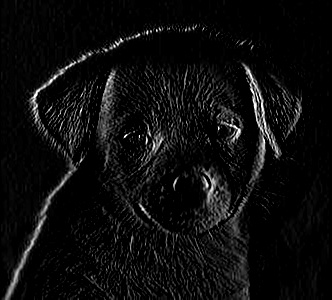

In [ ]:
'''Ans 5:- Padding is a technique in image processing and
convolutional neural networks (CNNs) used to maintain the spatial
dimensions of feature maps when applying convolutional operations. It
involves adding extra pixels (usually zeros) around the input image
or feature map before applying convolution. Padding helps
preserve information at the image's edges and ensures that the
output has the same spatial dimensions as the input. Two common
types of padding are "valid" (no padding) and "same" (adding
padding to match output size). Padding is crucial for preventing
the loss of valuable information at the image boundaries
during convolution.'''

In [ ]:
'''Ans 6:- Stride is a concept in convolutional operations,
specifying how much the convolutional kernel "steps" or moves across
the input image or feature map during the operation. A larger
stride skips more pixels, reducing the output's spatial
dimensions, while a smaller stride results in a larger output with
more overlapping information. Stride controls the level of
spatial downsampling or compression in convolutional neural
networks, influencing the network's receptive field and
computational complexity.'''

In [10]:
'''Ans 7:- In PyTorch, the input parameter of a 2D convolution is
typically a 4-dimensional tensor with shape [batch_size,
in_channels, height, width], where batch_size is the number of input
samples, in_channels is the number of input channels (e.g., 3 for
RGB images), and height and width are the spatial dimensions
of the input image.

The weight parameter for a 2D convolution is a
4-dimensional tensor with shape [out_channels, in_channels,
kernel_height, kernel_width], representing the number of output channels,
input channels, and kernel dimensions.'''

import torch
import torch.nn as nn

# Example input shape
batch_size = 1  # Number of input samples
in_channels = 3  # Number of input channels (e.g., RGB)
height = 64  # Height of the input image
width = 64  # Width of the input image

# Example weight shape
out_channels = 64  # Number of output channels
kernel_height = 3  # Height of the convolutional kernel
kernel_width = 3  # Width of the convolutional kernel

# Create a 2D convolutional layer
conv_layer = nn.Conv2d(in_channels, out_channels, kernel_size=(kernel_height, kernel_width))

# Use the layer with input data (assuming you have actual data)
input_data = torch.randn((batch_size, in_channels, height, width))
output = conv_layer(input_data)

print("Output shape:", output.shape)

Output shape: torch.Size([1, 64, 62, 62])


In [11]:
'''Ans 8:- In image processing and computer vision, a channel refers
to a separate component of an image that represents specific
information. In color images, channels typically correspond to color
channels, such as Red, Green, and Blue (RGB). In grayscale images,
there is a single channel representing pixel intensity. Channels
allow the representation of different aspects of an image,
enabling the processing of color, texture, or other visual features
independently.

In this code, we load a color image and use cv2.split to
separate it into its RGB channels. The shapes of the individual
channels are printed as output.'''

import cv2

# Load a color image
image = cv2.imread('sample.png')

# Split the image into its RGB channels
blue_channel, green_channel, red_channel = cv2.split(image)

# Print the shapes of the individual channels
print("Blue channel shape:", blue_channel.shape)
print("Green channel shape:", green_channel.shape)
print("Red channel shape:", red_channel.shape)

Blue channel shape: (200, 200)
Green channel shape: (200, 200)
Red channel shape: (200, 200)


In [14]:
'''Ans 9:- Matrix multiplication and convolution share similarities
in that they both involve a sliding operation with a kernel
over a matrix or tensor. In matrix multiplication, the kernel
is the weight matrix, and the sliding operation computes dot
products. In convolution, the kernel is applied to overlapping
patches of an input matrix, calculating element-wise products and
summing them. Both operations extract features by emphasizing
patterns within the input data.

Matrix multiplication typically involves matrices with
dimensions that align for multiplication, such as (m x n) * (n x p).'''

import numpy as np

# Create a simple input matrix (4x4)
input_matrix = np.array([[1, 2, 3, 4],
                         [5, 6, 7, 8],
                         [9, 10, 11, 12],
                         [13, 14, 15, 16]])

# Create a simple kernel (3x3)
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# Perform convolution (sliding kernel over the input matrix)
convolution_result = np.zeros((2, 2))
for i in range(2):
    for j in range(2):
        convolution_result[i, j] = np.sum(input_matrix[i:i+3, j:j+3] * kernel)

# Print the convolution result
print("Convolution Result:")
print(convolution_result)

Convolution Result:
[[-8. -8.]
 [-8. -8.]]


In [16]:
# Example matrices for matrix multiplication
matrix_A = np.random.rand(4, 3)
matrix_B = np.random.rand(3, 2)

# Perform matrix multiplication
matrix_multiplication_result = np.dot(matrix_A, matrix_B)

print(f"Matrix Multiplication Result: \n{matrix_multiplication_result}")

Matrix Multiplication Result: 
[[0.76744162 1.40979312]
 [0.20584055 0.35175868]
 [0.46176147 0.76550299]
 [0.42259717 1.11678822]]
